# Exploring ArcGIS REST Services
Data served via ArcGIS Servers support a REST API for accessing these services. This notebook provides some examples on how we can use Python to access these services using the `requests` package. 

→ Full documentation on the ArcGIS REST API: https://developers.arcgis.com/rest/services-reference/get-started-with-the-services-directory.htm

### NCOneMap's REST Endpoint
We'll explore NCOneMap's web services, accessed here: https://services.nconemap.gov/secure/rest/services.  
* Begin by navigating to that page to familiarize yourself with the organization and listing of individual services, i.e. the [Services Directory](https://developers.arcgis.com/rest/services-reference/using-the-services-directory.htm).
 * You'll see a number of folders containing other services and below that a number of services listed there in the main page. 
 * Note the types of services listed: `ImageServer`, `FeatureServer`, `MapServer`. These services provide access to different types of data. Other services provide access to data processing capabilities. 

* Next, click on the [`NC1Map_Census (MapServer)`](https://services.nconemap.gov/secure/rest/services/NC1Map_Census/MapServer) link to open the metadata for that [map service](https://developers.arcgis.com/rest/services-reference/map-service.htm).
 * You'll see a number of **properties** for the map service including a `Description`, a list of `Layers` included in that service, `Spatial Reference`, and at the very bottom, a list of the `Supported operations`. 
 * We'll explore how we can use the [`Export Map`](https://developers.arcgis.com/rest/services-reference/export-map.htm)operation to extract data from this service. 

* Click on the ['Export Map'](https://services.nconemap.gov/secure/rest/services/NC1Map_Census/MapServer/export?bbox=115398.88167874969,137561.22299815627,951284.8934306827,392245.24220382335) link at the bottom of the map service metadata page. 
 * Note the URL in the page that appears: This is a REST-based request. And the page that appears is a nifty form to help you edit and explore that REST-based URL. 
 * Change the <u>bounding box</u> values to: `-79.3, 35, -77.9, 36.5`
 * Since those coordinates we just supplied are in NAD 83 geographic coordinates, set the <u>bounding box spatial reference</u> to the WKID of `4269`
 

 * Click **Export Map (GET)** to generate the [URL](https://services.nconemap.gov/secure/rest/services/NC1Map_Census/MapServer/export?bbox=-79.3%2C+35%2C+-77.9%2C+36.5&bboxSR=4269&layers=&layerDefs=&size=&imageSR=&format=png&transparent=false&dpi=&time=&layerTimeOptions=&dynamicLayers=&gdbVersion=&mapScale=&rotation=&datumTransformations=&layerParameterValues=&mapRangeValues=&layerRangeValues=&f=html) reflecting our changes and display the results.

 * Enter `show:0` in the <u>Layers:</u> box to show only the first layer contained in this map service (1970 Census Boundary/Population). Upate the map by hitting **Export Map (GET)** again. 

 * Change the Format from `HTML` to `Image` and hit **Export Map (GET)** again. 

 * Copy the [URL](https://services.nconemap.gov/secure/rest/services/NC1Map_Census/MapServer/export?bbox=-79.3%2C+35%2C+-77.9%2C+36.5&bboxSR=4269&layers=show%3A0&layerDefs=&size=&imageSR=&format=png&transparent=false&dpi=&time=&layerTimeOptions=&dynamicLayers=&gdbVersion=&mapScale=&rotation=&datumTransformations=&layerParameterValues=&mapRangeValues=&layerRangeValues=&f=image) of the generated page and past between the quotes in code block below and run it. *We've captured that same image!* 

In [1]:
from IPython.display import Image
Image(url='https://services.nconemap.gov/secure/rest/services/NC1Map_Census/MapServer/export?bbox=-79.3%2C+35%2C+-77.9%2C+36.5&bboxSR=4269&layers=show%3A0&layerDefs=&size=&imageSR=&format=png&transparent=false&dpi=&time=&layerTimeOptions=&dynamicLayers=&gdbVersion=&mapScale=&rotation=&datumTransformations=&layerParameterValues=&mapRangeValues=&layerRangeValues=&f=image')

### Dissecting a Map Service REST request
Now let's dissect that URL into a service endpoint (its address) and a list of parmaters. 

Below is the full url: 
```html
https://services.nconemap.gov/secure/rest/services/NC1Map_Census/MapServer/export?bbox=-79.3%2C+35%2C+-77.9%2C+36.5&bboxSR=4269&layers=show%3A0&layerDefs=&size=&imageSR=&format=png&transparent=false&dpi=&time=&layerTimeOptions=&dynamicLayers=&gdbVersion=&mapScale=&rotation=&datumTransformations=&layerParameterValues=&mapRangeValues=&layerRangeValues=&f=image
```

Everything up to the `?` is the **service end point** (the server's internet address and the service location). Everything after that are **parameters** separated by `&`. 

* Break those into components we can use with the `requests` package, i.e. a URL variable and a dictionary of parmeter name:value pairs. 

In [2]:
theURL = 'https://services.nconemap.gov/secure/rest/services/NC1Map_Census/MapServer/export'
params = {"bbox":"-79.3, 35,-77.9, 36.5",
          "bboxSR":"4269",
          "layers":"show:0",
          "layerDefs":"",
          "size":"",
          "imageSR":"",
          "format":"png",
          "transparent":"false",
          "dpi":"",
          "time":"",
          "layerTimeOptions":"",
          "dynamicLayers":"",
          "gdbVersion":"",
          "mapScale":"",
          "rotation":"",
          "datumTransformation":"",
          "layerParameterValue":"",
          "mapRangeValues":"",
          "layerRangeValues":"",
          "f":"image"
         } 

* Now, let's import the `requests` package and execute our REST request. 

In [3]:
#import the modules
import requests

In [4]:
response = requests.get(theURL, params)

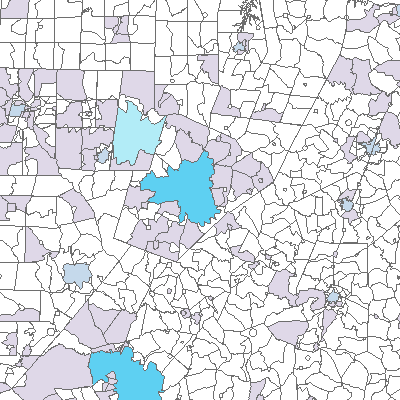

In [5]:
from IPython.display import Image
Image(response.content)

Ok, it's just the same as above, but we can easily change values in our `params` dict and modify the output. 

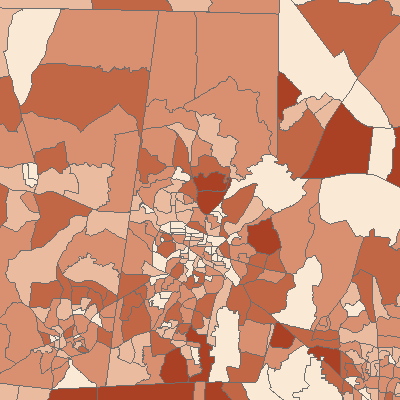

In [6]:
#Zoom more into Durham and show a different layer
params['bbox'] = '-79.0, 35.85, -78.8, 36.25'
params['layers'] = 'show:8'
response = requests.get(theURL, params)
Image(response.content)

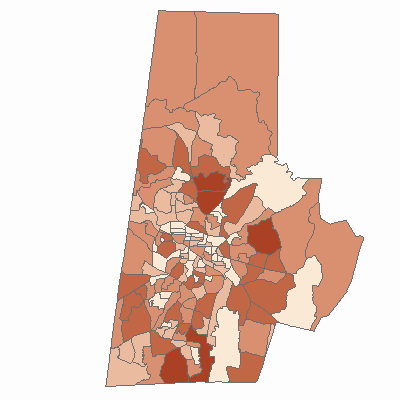

In [7]:
#Add a layer definition to just show durham county
params['layerDefs']="{8:GEOID10 LIKE '37063%'}"
response = requests.get(theURL, params)
Image(response.content)